In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/'My Drive'/programming/fast/digikala/q5

Mounted at /content/drive
/content/drive/My Drive/programming/fast/digikala/q5


In [3]:
pwd = %pwd

In [4]:
%ls

Archive.zip  Untitled0.ipynb


In [6]:
!unzip Archive.zip

Archive:  Archive.zip
  inflating: answer_test_db_users.csv  
  inflating: __MACOSX/._answer_test_db_users.csv  
  inflating: dkcup_test              


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
df = pd.read_csv('answer_test_db_users.csv')

In [19]:
print(df.shape)
df.head(10)

(893, 5)


,user_id,start_date,end_date,status,length
0,51725,2019-01-01,2019-01-01,1,1
1,116054,2019-01-01,2019-01-01,0,1
2,140223,2019-01-01,2019-01-02,1,2
3,275100,2019-01-01,2019-01-02,0,2
4,313779,2019-01-01,2019-01-03,1,3
5,393084,2019-01-01,2019-01-02,0,2
6,524607,2019-01-01,2019-01-05,1,5
7,538733,2019-01-01,2019-01-01,1,1
8,652373,2019-01-01,2019-01-03,1,3
9,668095,2019-01-01,2019-01-05,0,5


In [55]:
def dater(datestr,ind):
    date = datetime.strptime(datestr, '%Y-%m-%d')
    if ind == 0:
        return date.year
    elif ind ==1:
        return date.month
    elif ind == 2:
        return  date.day
    elif ind ==3:
        return date.timestamp()

In [59]:
a = datetime(2020,1,1)
a

datetime.datetime(2020, 1, 1, 0, 0)

In [62]:
type(dater('2020-01-01',3))

int

In [21]:
df['start_year'] = df['start_date'].apply(lambda x: dater(x,0))
df['start_month'] = df['start_date'].apply(lambda x: dater(x,1))
df['start_day'] = df['start_date'].apply(lambda x: dater(x,2))

In [22]:
df['end_year'] = df['end_date'].apply(lambda x: dater(x,0))
df['end_month'] = df['end_date'].apply(lambda x: dater(x,1))
df['end_day'] = df['end_date'].apply(lambda x: dater(x,2))

In [70]:
df['start_time'] = df['start_date'].apply(lambda x: dater(x,3))
df['end_time'] = df['end_date'].apply(lambda x: dater(x,3))
df['time'] = df.apply(lambda x: x['end_time'] - x['start_time'],axis=1)

In [71]:
df.head()

,user_id,start_date,end_date,status,length,start_year,start_month,start_day,end_year,end_month,end_day,start_time,end_time,time
0,51725,2019-01-01,2019-01-01,1,1,2019,1,1,2019,1,1,1546300800,1546300800,0
1,116054,2019-01-01,2019-01-01,0,1,2019,1,1,2019,1,1,1546300800,1546300800,0
2,140223,2019-01-01,2019-01-02,1,2,2019,1,1,2019,1,2,1546300800,1546387200,86400
3,275100,2019-01-01,2019-01-02,0,2,2019,1,1,2019,1,2,1546300800,1546387200,86400
4,313779,2019-01-01,2019-01-03,1,3,2019,1,1,2019,1,3,1546300800,1546473600,172800


In [106]:
df['length']

0      1
1      1
2      2
3      2
4      3
      ..
888    1
889    1
890    1
891    1
892    1
Name: length, Length: 893, dtype: int64

In [220]:
from fastai import *
from fastai.collab import *

In [72]:
df.columns

Index(['user_id', 'start_date', 'end_date', 'status', 'length', 'start_year',
       'start_month', 'start_day', 'end_year', 'end_month', 'end_day',
       'start_time', 'end_time', 'time'],
      dtype='object')

In [107]:
data = CollabDataBunch.from_df(df,valid_pct=0.2,rating_name='length',user_name='user_id',item_name='status')
data

TabularDataBunch;

Train: LabelList (715 items)
x: CollabList
user_id 51725; status 1; ,user_id 116054; status 0; ,user_id 140223; status 1; ,user_id 275100; status 0; ,user_id 538733; status 1; 
y: FloatList
1.0,1.0,2.0,2.0,1.0
Path: .;

Valid: LabelList (178 items)
x: CollabList
user_id 955343; status 0; ,user_id 668095; status 1; ,user_id 140223; status 1; ,user_id 524607; status 0; ,user_id 973509; status 0; 
y: FloatList
1.0,1.0,2.0,1.0,1.0
Path: .;

Test: None

In [74]:
import sqlite3

In [30]:
con = sqlite3.connect('dkcup_test')

In [32]:
cur = con.cursor()

In [37]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('users_log',)]


In [101]:
SQL = pd.read_sql_query("SELECT * from users_log", con)

In [91]:
sql['status'] = sql['log']
sql = sql.drop(['date','log'],axis=1)
sql

,user_id,status
0,393084,0
1,393084,0
2,393084,1
3,393084,1
4,393084,0
...,...,...
1795,652373,0
1796,652373,0
1797,652373,0
1798,652373,0


In [77]:
data.show_batch()

user_id,status,target
756822,1,3.0
804052,0,1.0
275100,1,1.0
689765,1,1.0
870095,1,3.0


In [219]:
TabularModel(emb_size={''})

TypeError: ignored

In [134]:
learner = collab_learner(data, n_factors=5, y_range=[-2,20],)

epoch,train_loss,valid_loss,time
0,49.975910,#na#,00:00
1,49.926861,#na#,00:00
2,49.893021,#na#,00:00
3,49.893486,#na#,00:00
4,49.688782,#na#,00:00
5,48.092213,#na#,00:00
6,39.256050,#na#,00:00
7,33.867432,#na#,00:00
8,41.935009,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


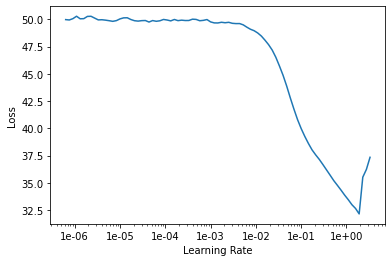

In [135]:
learner.lr_find()
learner.recorder.plot()

In [136]:
learner.fit_one_cycle(50,3e-2)

epoch,train_loss,valid_loss,time
0,48.845444,48.544682,00:00
1,47.657673,45.470825,00:00
2,45.533749,40.163734,00:00
3,42.252197,31.285530,00:00
4,37.126133,18.214436,00:00
5,30.172482,5.357918,00:00
6,23.276289,1.769158,00:00
7,18.285604,2.294876,00:00
8,14.602494,1.887620,00:00
9,11.792616,2.063643,00:00


In [137]:
learner.save(pwd +'/freezed')

epoch,train_loss,valid_loss,time
0,1.911021,#na#,00:00
1,1.928095,#na#,00:00
2,1.933030,#na#,00:00
3,1.928715,#na#,00:00
4,1.922348,#na#,00:00
5,1.866897,#na#,00:00
6,1.918561,#na#,00:00
7,2.154403,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


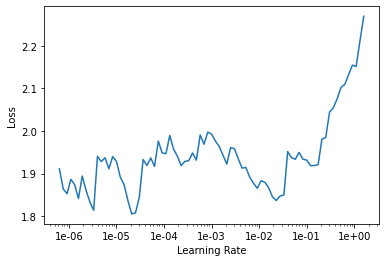

In [138]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [139]:
learner.fit_one_cycle(50,slice(1e-05))

epoch,train_loss,valid_loss,time
0,1.905260,1.885090,00:00
1,1.915394,1.885088,00:00
2,1.928446,1.885086,00:00
3,1.911605,1.885095,00:00
4,1.920211,1.885085,00:00
5,1.923574,1.885088,00:00
6,1.927209,1.885101,00:00
7,1.929752,1.885103,00:00
8,1.930351,1.885131,00:00
9,1.929023,1.885128,00:00


In [140]:
learner.save(pwd + '/unfreezed')

In [141]:

data.train_ds[0]

(CollabLine [tensor(1), tensor(2)], FloatItem 1.0)

In [123]:
a = data.train_ds[0][0]

In [ ]:
learner.predict(a)

In [98]:
from tqdm import tqdm

In [147]:
preds = []
for i in tqdm(range(sql.shape[0])):
    preds.append(round(float(learner.predict(sql.iloc[i])[1])))

100%|██████████| 1800/1800 [00:10<00:00, 177.39it/s]


In [194]:
preds_train = []
for i in tqdm(range(100)):
    preds_train.append(float(learner.predict(df.iloc[i])[1]))

pd.DataFrame({'y_true':df['length'][:100],'y_pred':preds_train})

100%|██████████| 100/100 [00:01<00:00, 99.69it/s]


,y_true,y_pred
0,1,1.0
1,1,0.0
2,2,1.0
3,2,2.0
4,3,2.0
...,...,...
95,1,0.0
96,2,1.0
97,1,0.0
98,1,0.0


In [128]:
df['length']

0      1
1      1
2      2
3      2
4      3
      ..
888    1
889    1
890    1
891    1
892    1
Name: length, Length: 893, dtype: int64

In [195]:
DF = pd.DataFrame()

In [196]:
SQL.head()

,date,user_id,log
0,2019-01-01,393084,0
1,2019-01-02,393084,0
2,2019-01-03,393084,1
3,2019-01-04,393084,1
4,2019-01-05,393084,0


In [198]:
DF['date'] = SQL['date']
DF['user_id'] = SQL['user_id']
DF['status'] = SQL['log']
DF['length'] = preds 

In [199]:
DF.length.nunique()

2

In [200]:
DF

,date,user_id,status,length
0,2019-01-01,393084,0,2
1,2019-01-02,393084,0,2
2,2019-01-03,393084,1,2
3,2019-01-04,393084,1,2
4,2019-01-05,393084,0,2
...,...,...,...,...
1795,2019-03-27,652373,0,2
1796,2019-03-28,652373,0,2
1797,2019-03-29,652373,0,2
1798,2019-03-30,652373,0,2


In [159]:
gk = df.groupby('user_id')

In [162]:
n =gk.get_group(51725)

In [165]:
n[n['length']== 1]

,user_id,start_date,end_date,status,length,start_year,start_month,start_day,end_year,end_month,end_day,start_time,end_time,time
0,51725,2019-01-01,2019-01-01,1,1,2019,1,1,2019,1,1,1546300800,1546300800,0
53,51725,2019-01-06,2019-01-06,0,1,2019,1,6,2019,1,6,1546732800,1546732800,0
158,51725,2019-01-17,2019-01-17,1,1,2019,1,17,2019,1,17,1547683200,1547683200,0
165,51725,2019-01-18,2019-01-18,0,1,2019,1,18,2019,1,18,1547769600,1547769600,0
177,51725,2019-01-19,2019-01-19,1,1,2019,1,19,2019,1,19,1547856000,1547856000,0
187,51725,2019-01-20,2019-01-20,0,1,2019,1,20,2019,1,20,1547942400,1547942400,0
217,51725,2019-01-23,2019-01-23,0,1,2019,1,23,2019,1,23,1548201600,1548201600,0
225,51725,2019-01-24,2019-01-24,1,1,2019,1,24,2019,1,24,1548288000,1548288000,0
259,51725,2019-01-27,2019-01-27,1,1,2019,1,27,2019,1,27,1548547200,1548547200,0
288,51725,2019-01-30,2019-01-30,1,1,2019,1,30,2019,1,30,1548806400,1548806400,0


In [167]:
from fastai.tabular import *

In [169]:
data = TabularList.from_df(df=df,cat_names = ['status','start_year','start_month','start_day','user_id'],procs=[Categorify])

In [170]:
data= data.split_by_rand_pct(0.2)

In [171]:
data =data.label_from_df('length')

In [173]:
data = data.databunch()
data

TabularDataBunch;

Train: LabelList (715 items)
x: TabularList
status 0; start_year 2019; start_month 1; start_day 1; user_id 116054; ,status 1; start_year 2019; start_month 1; start_day 1; user_id 140223; ,status 1; start_year 2019; start_month 1; start_day 1; user_id 313779; ,status 1; start_year 2019; start_month 1; start_day 1; user_id 524607; ,status 1; start_year 2019; start_month 1; start_day 1; user_id 538733; 
y: CategoryList
1,2,3,5,1
Path: .;

Valid: LabelList (178 items)
x: TabularList
status 1; start_year 2019; start_month 3; start_day 31; user_id 393084; ,status 1; start_year 2019; start_month 3; start_day 20; user_id 946932; ,status 0; start_year 2019; start_month 3; start_day 12; user_id 51725; ,status 1; start_year 2019; start_month 2; start_day 12; user_id 668095; ,status 0; start_year 2019; start_month 1; start_day 30; user_id 870095; 
y: CategoryList
1,2,1,1,1
Path: .;

Test: None

In [174]:
data.show_batch()

status,start_year,start_month,start_day,user_id,target
0,2019,1,18,922731,3
1,2019,2,27,524607,2
0,2019,2,6,946932,1
1,2019,3,30,870095,2
1,2019,1,24,275100,1


In [175]:
learner = tabular_learner(data,[200,100],metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


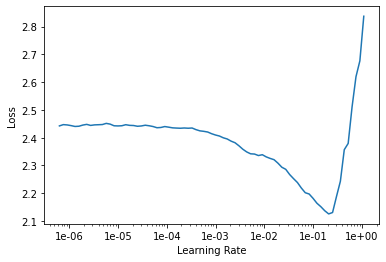

In [176]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(120,slice(7e-02),wd=1.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


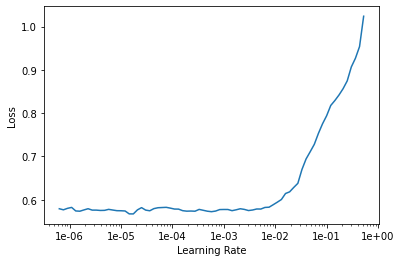

In [187]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(120,slice(1e-03),wd=2)

In [190]:
learner.save(pwd + '/tabular')

In [ ]:
learner.load(pwd + '/tabular')

In [ ]:
PRED = []
for i in tqdm(range(sql.shape[0])):
    PRED.append(lea)

In [206]:
test = pd.DataFrame()

In [209]:
test['date'] = SQL['date']
test['user_id'] = SQL['user_id']
test['status'] = SQL['log']

test.head()

,date,user_id,status
0,2019-01-01,393084,0
1,2019-01-02,393084,0
2,2019-01-03,393084,1
3,2019-01-04,393084,1
4,2019-01-05,393084,0


In [211]:
test['start_year'] = test['date'].apply(lambda x: dater(x,0))
test['start_month'] = test['date'].apply(lambda x: dater(x,1))
test['start_day'] = test['date'].apply(lambda x: dater(x,2))

In [213]:
test = test.drop('date',axis=1)
test

,user_id,status,start_year,start_month,start_day
0,393084,0,2019,1,1
1,393084,0,2019,1,2
2,393084,1,2019,1,3
3,393084,1,2019,1,4
4,393084,0,2019,1,5
...,...,...,...,...,...
1795,652373,0,2019,3,27
1796,652373,0,2019,3,28
1797,652373,0,2019,3,29
1798,652373,0,2019,3,30


In [215]:
learner.predict(test.iloc[0])

(Category tensor(1),
 tensor(1),
 tensor([3.3498e-02, 9.5647e-01, 9.6937e-04, 9.1466e-04, 4.7075e-03, 2.8368e-04,
         1.4430e-03, 3.4657e-04, 6.6670e-04, 7.0517e-04]))

In [216]:
PRED = []
for i in tqdm(range(sql.shape[0])):
    PRED.append(learner.predict(test.iloc[i])[1])

100%|██████████| 1800/1800 [00:16<00:00, 109.11it/s]


In [218]:
test['lenght'] = PRED
test

,user_id,status,start_year,start_month,start_day,lenght
0,393084,0,2019,1,1,tensor(1)
1,393084,0,2019,1,2,tensor(0)
2,393084,1,2019,1,3,tensor(1)
3,393084,1,2019,1,4,tensor(1)
4,393084,0,2019,1,5,tensor(1)
...,...,...,...,...,...,...
1795,652373,0,2019,3,27,tensor(1)
1796,652373,0,2019,3,28,tensor(0)
1797,652373,0,2019,3,29,tensor(0)
1798,652373,0,2019,3,30,tensor(1)
